In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import quantecon as qe

from scipy import optimize

## Exercise 1

In [2]:
# Part a
# Using an input of N and an X vector, as even though the length of the X vector should be the same as N. There can be cases
# where the X vector is significantly longer thanthe length of the X vector
def rosenbrock(X):
    summation = 0
    for i in range(len(X)-1):
        summation += (1 - X[i]) ** 2 + (X[i+1] - X[i] ** 2) ** 2
    return summation

In [3]:
# Part b
N = [3, 4, 5]

for i, n in enumerate(N):
    print(f"-------------- For N = {n} --------------")
    list_ranges_X = [(-2, 2)] * n
    ranges_X = tuple(list_ranges_X)
    start_time = time.time()
    res1 = optimize.brute(rosenbrock, ranges_X)
    end_time = time.time()
    print(f"Optimisation time: {round(end_time - start_time, 6)} seconds")
    print(f"The minimium value of the Rosenbrock function is: {round(rosenbrock(res1), 10)}")
    print(f"And the corresponding solutions are: \n{np.round(res1, 5)}")
    
print("Therefore we can see the computational time increases significantly after 4 dimenstions and the accuracy of the \
corresponding solutions also decrease which can be seen by the minimum value of the Rosenbrock solution.")


-------------- For N = 3 --------------
Optimisation time: 0.02305 seconds
The minimium value of the Rosenbrock function is: 1.1e-09
And the corresponding solutions are: 
[1.00001 1.00001 0.99999]
-------------- For N = 4 --------------
Optimisation time: 0.560796 seconds
The minimium value of the Rosenbrock function is: 1.2e-09
And the corresponding solutions are: 
[1.00001 0.99999 0.99999 0.99997]
-------------- For N = 5 --------------
Optimisation time: 12.826638 seconds
The minimium value of the Rosenbrock function is: 9.2e-09
And the corresponding solutions are: 
[1.00002 1.00003 1.00002 1.00002 0.99997]
Therefore we can see the computational time increases significantly after 4 dimenstions and the accuracy of the corresponding solutions also decrease which can be seen by the minimum value of the Rosenbrock solution.


In [4]:
# Part c
N = 30
x0 = [0] * N
# Need to select proper bounds and as long as x0 is greater than our lower bound
# and the minimisation is lower than our upper bound powell will give an accurate minimsation
bnds = tuple([(0, 100)] * N)
non_bounded_methods = ['BFGS', 'nelder-mead']
bounded_methods = ['powell']
for non_bounded_method in non_bounded_methods:
    print(f"---------{non_bounded_method} method ---------")
    start_time = time.time()
    res = optimize.minimize(rosenbrock,x0, method=non_bounded_method)
    end_time = time.time()
    print(f"Optimisation for the minimum result:", rosenbrock(res.x))
    print(f"Optimisation time: {round(end_time - start_time, 6)} seconds")
    
for bounded_method in bounded_methods:
    print(f"---------{bounded_method} method ---------")
    start_time = time.time()
    res = optimize.minimize(rosenbrock,x0, method=bounded_method, bounds=bnds)
    end_time = time.time()
    print(f"Optimisation for the minimum result:", rosenbrock(res.x))
    print(f"Optimisation time: {round(end_time - start_time, 6)} seconds")


---------BFGS method ---------
Optimisation for the minimum result: 5.162175261786248e-14
Optimisation time: 0.082635 seconds
---------nelder-mead method ---------
Optimisation for the minimum result: 26.88025980941206
Optimisation time: 0.38839 seconds
---------powell method ---------
Optimisation for the minimum result: 7.923560424113767e-09
Optimisation time: 0.649583 seconds


The algorithm that is the quickest is the BFGS method, and it is also the most accurate method aswell. This may be due to the BFGS method being a quasi-Newton optimisation algorithm. It maintains an approximation of the Hessian matrix which helps it converge more rapidly towards the optimum, additionally it requires fewer function evaluations per iteration. It can be seen here that the Nelder-Mead method struggles with functions having narrow valleys, which is what the Rosenbrock function is known for having. The Nelder-Mead struggles due to its reliance on simplex transformations. 

In [5]:
# Part d
N = 100 # Increasing N increases the accuracy but the computing time also increases
x0 = [0] * N # Initial guess, changes the initial guess slightly changes the results but not significantly
bnds = tuple([(0, 2)] * N) # changing the bounds slightly changes the results but not significantly as it changes the area 
# it is looking for an answer in
non_bounded_methods = ['BFGS', 'nelder-mead']
bounded_methods = ['powell']
for non_bounded_method in non_bounded_methods:
    print(f"--------- {non_bounded_method} method ---------")
    start_time = time.time()
    res = optimize.minimize(rosenbrock,x0, method=non_bounded_method)
    end_time = time.time()
    print(f"Optimisation for the minimum result:", rosenbrock(res.x))
    print(f"Optimisation time: {round(end_time - start_time, 6)} seconds")
    
for bounded_method in bounded_methods:
    print(f"--------- {bounded_method} method ---------")
    start_time = time.time()
    res = optimize.minimize(rosenbrock,x0, method=bounded_method, bounds=bnds)
    end_time = time.time()
    print(f"Optimisation for the minimum result:", rosenbrock(res.x))
    print(f"Optimisation time: {round(end_time - start_time, 6)} seconds")


--------- BFGS method ---------
Optimisation for the minimum result: 1.2672294118043158e-11
Optimisation time: 3.04018 seconds
--------- nelder-mead method ---------
Optimisation for the minimum result: 97.77170705842435
Optimisation time: 3.323818 seconds
--------- powell method ---------
Optimisation for the minimum result: 8.408792998050904e-09
Optimisation time: 2.498246 seconds


Part e

We can see from the previous exercise that when N starts to get large the algorithm that performs the best is the BFGS method.
One con of the Nelder-Mead method is that it does not ensure that the global maximum or minimum is found, we have found this to be the case especially when our initial guess of zeros is near the flat region. One reason why the BFGS method outperformed the Powell method in this case is because the Powell method depends on the bounds we picked, this can be seen when repeating the test cases for Powell with bounds (0,2) and then it computes at around the same time as BFGS. Additionally, one of the main benefits of BFGS is that it requires few functions to evaluate which helps to improve its computational speed.

## Exercise 2

Part a

For Firm 1:
$$
\frac{{d}}{{dq_1}} \left( - \frac{1}{2}c_1 \cdot q_1^2 + \frac{{q_1}}{{(q_1 + q_2)^\alpha}} \right)
$$

For Firm 2:
$$
\frac{{d}}{{dq_2}} \left( - \frac{1}{2} c_2 \cdot q_2^2 + \frac{{q_2}}{{(q_1 + q_2)^\alpha}} \right)
$$

We can proceed to compute these derivatives:

For Firm 1:
$$
\frac{{d}}{{dq_1}} \left( - c_1 \cdot q_1^2 + \frac{{q_1}}{{(q_1 + q_2)^\alpha}} \right) = -c_1q_1 + \frac{{1}}{{(q_1 + q_2)^\alpha}} - \frac{{\alpha q_1}}{{(q_1 + q_2)^{\alpha+1}}}
$$

$$
= (q_1 + q_2)^{(-\alpha-1)} (-\alpha q_1+q_1+q_2) - c_1q_1
$$


For Firm 2:
$$
\frac{{d}}{{dq_2}} \left( -c_2 \cdot q_2^2 + \frac{{q_2}}{{(q_1 + q_2)^\alpha}} \right) = -c_2q_2 + \frac{{1}}{{(q_1 + q_2)^\alpha}} - \frac{{\alpha q_2}}{{(q_1 + q_2)^{\alpha+1}}}
$$

$$
= (q_1 + q_2)^{(-\alpha-1)} (-\alpha q_2+q_1+q_2) - c_2q_2
$$

These are the first-order conditions (FOCs) for each firm in the Cournot competition.

In [6]:
# Part a continued
# Proof that what we derived is accurate
    
import sympy as sym
alpha = 0.625
c_1 = 0.6
c_2 = 0.8
def price(q):
    return q**(-alpha)
def costs_1(q_1):
    return 1/2 * c_1 * q_1**2
def costs_2(q_2):
    return 1/2 * c_2 * q_2**2

pi_1, pi_2, q_1, q_2 = sym.symbols('pi_1'), sym.symbols('pi_2'), sym.symbols('q_1'), sym.symbols('q_2')
eq_1 = sym.Eq(pi_1, price(q_1 + q_2)*q_1 - costs_1(q_1))
eq_2 = sym.Eq(pi_2, price(q_1 + q_2)*q_2 - costs_2(q_2))

foc_1 = sym.diff(eq_1.rhs, q_1)
foc_2 = sym.diff(eq_2.rhs, q_2)

print(f"We find the partial derivatives of the companies profit with respect to there output as that is the only thing they can\
 control as they cannot control the other companies output.")
print(f"The first order condition for firm 1 is:")
foc_1

We find the partial derivatives of the companies profit with respect to there output as that is the only thing they can control as they cannot control the other companies output.
The first order condition for firm 1 is:


-0.625*q_1/(q_1 + q_2)**1.625 - 0.6*q_1 + (q_1 + q_2)**(-0.625)

In [7]:
print(f"The first order condition for firm 2 is:")
foc_2

The first order condition for firm 2 is:


-0.625*q_2/(q_1 + q_2)**1.625 - 0.8*q_2 + (q_1 + q_2)**(-0.625)

which is equivalent to the equations we had worked out previously but where we have subbed in the initial conditions $\alpha = 0.625$, $c_1=0.6$ and $c_2=0.8$.

In [8]:
# Part b
# Define parameters
alpha = 0.625
c1 = 0.6
c2 = 0.8

# Creating the first order conditions
def equations(q):
    q1, q2 = q[0], q[1]
    return [
        ((q1 + q2)**(-alpha-1))* (-alpha*q1+q1+q2) - c1 * q1,
        ((q1 + q2)**(-alpha-1))* (-alpha*q2+q1+q2) - c2 * q2
    ]


# Finding the Cournot equilibrium
# Initial guess for q1 and q2 however after playing around with a few work as long as both guesses aren't 0
# because then we have division by 0 which is problematic
initial_guess = np.array([2, 2]) 

result = optimize.fsolve(equations, initial_guess)
q1_star, q2_star = result

# Calculating equilibrium price using the function we created previously called price
p_star = price(q1_star+q2_star)

print("Cournot Equilibrium in a Duopoly:")
print(f"q1* = {q1_star}")
print(f"q2* = {q2_star}")
print(f"p*  = {p_star}")

# Creating a list of the prices for part f so they can be plotted
equilibrium_prices = [p_star]

Cournot Equilibrium in a Duopoly:
q1* = 0.8395676035356306
q2* = 0.688796431163012
p*  = 0.7671110596740394


Because the firms are competing with eachother on quantities, maximising profits and taking as given the other firms output. Firm 1 has lower production costs this may suugest they have some cost advantages or have found a more efficient way of production. Firm 1 chooses to produce a higher quantity. The market equilibrium price, $p^*$, is determined based on the interaction of the quantities supplied by both firms and the demand from consumers ensuring that the market clears.

Part c

For Firm \( n \):
$$
\frac{{d \pi _n}}{{dq_n}} \left( -\frac{1}{2} c_n \cdot q_n^2 + \frac{{q_n}}{{(q_1 + \ldots + q_n)^\alpha}} \right)
$$

We can proceed to compute this derivative:

For Firm \( n \):
$$
\frac{{d \pi _n}}{{dq_n}} \left( - \frac{1}{2} c_n \cdot q_n^2 + \frac{{q_n}}{{(q_1 + \ldots + q_n)^\alpha}} \right) = -c_nq_n + \frac{{1}}{{(q_1 + \ldots + q_n)^\alpha}} - \frac{{\alpha q_n}}{{(q_1 + \ldots + q_n)^{\alpha+1}}}
$$

$$
= (q_1 + \ldots + q_n)^{(-\alpha-1)} (-\alpha q_n+q_1 + \ldots +q_n) - c_nq_n
$$

This is the first-order condition (FOC) for Firm \( n \) in the Cournot competition when there are \( N \) firms.

In [9]:
# Part c continued
# Implementing the equation we have just worked out

def cournot_focs(q, N, alpha, costs):
    qs = np.array(q)  
    focs = []
    for i in range(N):
        foc = (sum(qs)) ** (-alpha - 1) * (-alpha * q[i] + sum(qs)) - costs[i] * q[i]
        focs.append(foc)
    return focs



In [10]:
# Part d
def cournot_equilibrium(N, alpha, costs):
    q0 = [2.0] * N
    root = optimize.fsolve(lambda q: cournot_focs(q, N, alpha, costs), q0)
    root = np.round(root, 4)
    price_star = price(sum(root))
    print(f"In a market with {N} firms that compete with eachother.")
    print(f"The equilibrium quantities:\n{tuple(root)}")
    print(f"The equilibrium price: {round(price_star, 4)}")
    # For part f
    equilibrium_prices.append(price_star)
    
costs = [0.6, 0.8, 0.5]
alpha = 0.625
cournot_equilibrium(3, alpha, costs)

costs = [0.6, 0.8, 0.5, 0.5, 0.4, 0.2]
cournot_equilibrium(6, alpha, costs)

In a market with 3 firms that compete with eachother.
The equilibrium quantities:
(0.7806, 0.6183, 0.8985)
The equilibrium price: 0.5946
In a market with 6 firms that compete with eachother.
The equilibrium quantities:
(0.5812, 0.4444, 0.6869, 0.6869, 0.8397, 1.5123)
The equilibrium price: 0.3776


In [11]:
# Part e
costs = [0.6] * 10
cournot_equilibrium(10, 0.625, costs)

costs = [0.6] * 15
cournot_equilibrium(15,0.625, costs)

In a market with 10 firms that compete with eachother.
The equilibrium quantities:
(0.5428, 0.5428, 0.5428, 0.5428, 0.5428, 0.5428, 0.5428, 0.5428, 0.5428, 0.5428)
The equilibrium price: 0.3474
In a market with 15 firms that compete with eachother.
The equilibrium quantities:
(0.4708, 0.4708, 0.4708, 0.4708, 0.4708, 0.4708, 0.4708, 0.4708, 0.4708, 0.4708, 0.4708, 0.4708, 0.4708, 0.4708, 0.4708)
The equilibrium price: 0.2947


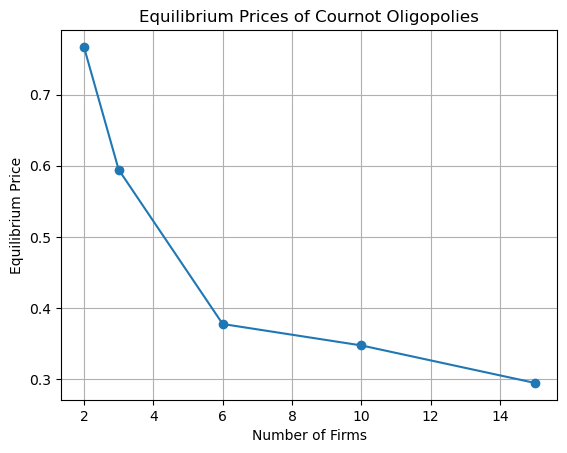

When there are more firms competing this makes it harder for firms to charge higher prices as another firm could lower prices and gain the whole market. Therefore, intuitively we would expect that when there are more firms this drives the price down, espicially when the firms take as given the other firms' output. This means that there is more supply for any given demand when there are more firms in the market, which in turn drives prices down.


In [12]:
# Part f
N = [2, 3, 6, 10, 15]
plt.plot(N, equilibrium_prices, marker='o')
plt.xlabel('Number of Firms')
plt.ylabel('Equilibrium Price')
plt.title('Equilibrium Prices of Cournot Oligopolies')
plt.grid(True)
plt.show()

print(f"When there are more firms competing this makes it harder for firms to charge higher prices \
as another firm could lower prices and gain the whole market. Therefore, intuitively we would expect \
that when there are more firms this drives the price down, espicially when the firms take as given \
the other firms' output. This means that there is more supply for any given demand when there are more \
firms in the market, which in turn drives prices down.")

## Exercise 3

In [13]:
# Part a
# Autonomating the code rather than working it out every time
def utility(c, theta=1.5):
    return (c**(1-theta))/(1-theta)

def optimisation(vars, y, beta=0.96):
    c_values = vars[:len(y)]  # Extracting c values from vars
    a_values = vars[len(y):]  # Extracting a values from vars
    maximisation_eq = 0
    # Working it out in a sum rather than adding each periods equation seperately
    for period in range(len(y)):
        maximisation_eq += beta**period * utility(c_values[period])
    return -maximisation_eq

def constraints(vars, y, r, a_0 = 0):
    c_values = vars[:len(y)]  
    a_values = vars[len(y):]
    constraints = []
    # Creating the different equations to add to the constraint depending on what period it is
    for period in range(len(y)):
        if period == 0:
            constraint = c_values[period]+a_values[period]-a_0-y[period]
            constraints.append(constraint)
        elif period > 0 and period < len(y)-1:
            constraint = c_values[period]+a_values[period]-(1+r)*a_values[period-1]-y[period]
            constraints.append(constraint)
        elif period == len(y)-1:
            constraint = c_values[period] - (1+r)*a_values[period-1]-y[period]
            constraints.append(constraint)
    return constraints
            

def steady_state_eq(y, r):
    x_0 = [0.1] * ((len(y)*2)-1)  # Initial guess for c and a_1 changing the initial guess changes the results
    bounds = [(None, None)] * ((2*len(y))-1) # Bounds for c and a_1
    result = optimize.minimize(lambda vars: optimisation(vars, y), x_0, \
                               constraints={'type': 'eq', 'fun': lambda vars: constraints(vars, y, r)}, bounds=bounds)
    optimal_consumption = result.x
    
    return tuple(optimal_consumption[:len(y)]), optimal_consumption[len(y):]

def plot_consumption_and_income(c, y):
    periods = []
    for period in range(len(c)):
        periods.append(f"t={period}")

    y_values = y
    c_values = c

    plt.plot(periods, y_values, label='Income (y)')
    plt.plot(periods, c_values, label='Consumption (c)')
    plt.xlabel('Time Periods')
    plt.ylabel('Values')
    plt.title('Income and Consumption Over Time')
    plt.legend()
    plt.show()
    

The equilibrium consumption:
(7.554, 7.548)


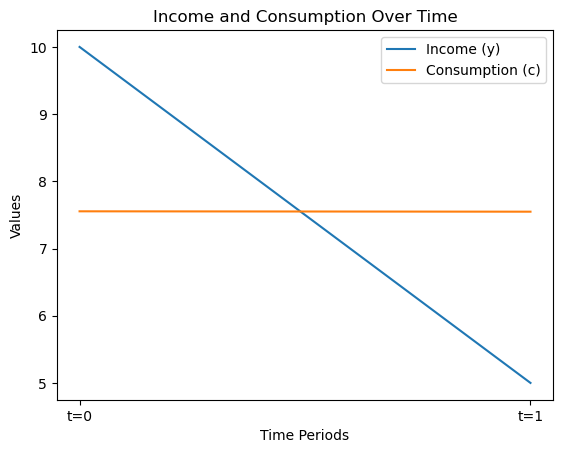

In [14]:
# PLot for part a
y = [10, 5]
r = rate = (1/0.96)-1
consumption, savings_rate_certainty = steady_state_eq(y, r)
print(f"The equilibrium consumption:\n{tuple(np.round(consumption, 3))}")

plot_consumption_and_income(consumption, y)


We can see the main factor why a flatter life-cycle of preferred is because the beta value is close to 1, which flattens lifetime consumption.

The equilibrium consumption:
(7.578, 7.543, 7.533, 7.531)


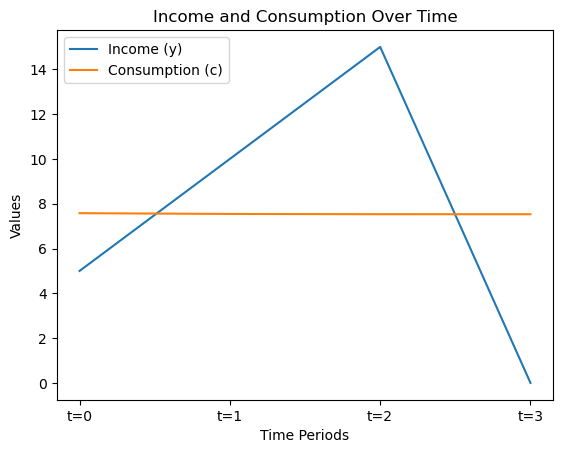

In [15]:
# Plot for part b
y=[5,10,15,0]
rate = (1/0.96)-1
consumption, savings_rate = steady_state_eq(y, rate)
print(f"The equilibrium consumption:\n{tuple(np.round(consumption, 3))}")

plot_consumption_and_income(consumption, y)

The equilibrium consumption with interest rate 0.01:
(7.79, 7.581, 7.41, 7.259)
The equilibrium consumption with interest rate 0.04:
(7.589, 7.544, 7.526, 7.517)
The equilibrium consumption with interest rate 0.08:
(7.368, 7.525, 7.653, 7.838)


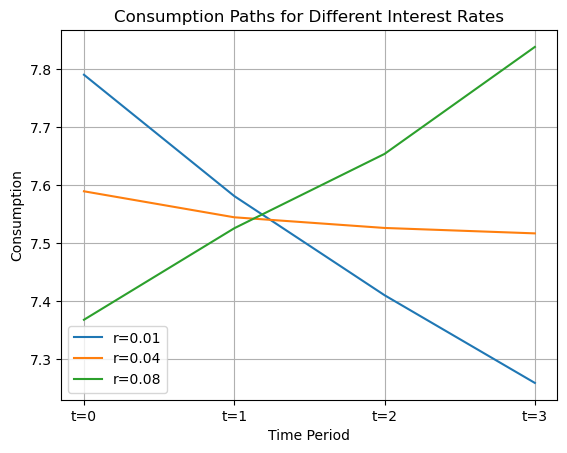

In [16]:
# Plot for part c

r = [0.01, 0.04, 0.08]
y = [5, 10, 15, 0]

consumption_paths = []
for rate in r:
    consumption, savings_rate = steady_state_eq(y, rate)  
    print(f"The equilibrium consumption with interest rate {rate}:\n{tuple(np.round(consumption, 3))}")

    consumption_paths.append(consumption)
    
for i, c in enumerate(consumption_paths):
    periods = [f"t={period}" for period in range(len(c))]
    plt.plot(periods, c, label=f'r={r[i]}')

plt.xlabel('Time Period')
plt.ylabel('Consumption')
plt.title('Consumption Paths for Different Interest Rates')
plt.legend()
plt.grid(True)
plt.show()


Changes in the interest rate (r) affect optimal life-cycle consumption. Higher rates raise the opportunity cost of consuming today, prompting individuals to save more for future consumption. This results in a lower level of current consumption and higher savings. Conversely, lower interest rates reduce the cost of current consumption, leading to higher present consumption and lower savings. 

In [17]:
# Part d
def utility(c, theta=1.5):
    return (c**(1-theta))/(1-theta)

def consumption(vars, y, r, periods, unceratinty_period, a_0=0):
    c_values = vars[:periods]  # Extracting c values from vars
    a_values = vars[periods:]  # Extracting a values from vars
    if uncertainty_period == 1:
        return -a_values[0]+a_0+y
    if unceratinty_period == periods:
        return (1+r)*a_values[uncertainty_period - 2] + y
    else:
        return -a_values[uncertainty_period-1]+(1+r)*a_values[uncertainty_period -2] + y

def optimisation(vars, y, r, periods, outcomes, probabilities, uncertainty_period, beta=0.96):
    c_values = vars[:periods]  # Extracting c values from vars
    a_values = vars[periods:]  # Extracting a values from vars
    maximisation_eq = 0
    for period in range(periods):
        if period == uncertainty_period-1:
            sum_prob_utilities = 0
            for i, outcome in enumerate(outcomes):
                sum_prob_utilities += probabilities[i]*utility(consumption(vars, outcome, r, periods, uncertainty_period))
            maximisation_eq += beta**period*sum_prob_utilities
        else:
            maximisation_eq += beta**period * beta**period * utility(c_values[period])
    return -maximisation_eq

def constraints(vars, y, r, periods, outcome, a_0=0):
    c_values = vars[:periods]
    a_values = vars[periods:]
    constraints = []
    for period in range(periods):
        if period == 0:
            constraint = c_values[period]+a_values[period]-a_0-y[period]
            constraints.append(constraint)
        elif period > 0 and period < periods-1:
            constraint = c_values[period]+a_values[period]-(1+r)*a_values[period-1]-y[period]
            constraints.append(constraint)
        elif period == periods-1:
            constraint = c_values[period] - (1+r)*a_values[period-1]-y[period]
            constraints.append(constraint)
    return constraints


def steady_state_eq(y, r, periods, outcomes, probabilities, uncertainty_period):  
    x_0 = [1] * ((periods*2)-1)  # Initial guess for c's and a's (1 less a than c) changing the initial guess changes the results
    bounds = [(None, None)] * ((periods*2)-1) # Bounds for all the c's and a's
    result = optimize.minimize(lambda vars: optimisation(vars, y, r, periods, outcomes, probabilities, uncertainty_period), x_0, \
                               constraints={'type': 'eq', 'fun': lambda vars: constraints(vars, y, r, periods, outcomes)}, bounds=bounds)
    optimal_consumption = result.x

    return tuple(optimal_consumption[:periods]), optimal_consumption[periods:]


outcomes = [2.5, 7.5]
probabilities = [1/2, 1/2]
periods = 2
uncertainty_period = 2
r = (1/0.96)-1

y_low = [10, 2.5]
low_outcome_consumption, low_outcome_savings = steady_state_eq(y_low, r, periods, outcomes, probabilities, uncertainty_period)

y_high = [10, 7.5]
high_outcome_consumption, high_outcome_savings = steady_state_eq(y_high, r, periods, outcomes, probabilities, uncertainty_period)

print(f"The optimal consumption path for consumption with income takes a low realisation is: \
{np.round(low_outcome_consumption, 3)}. And the optimal savings rate is {np.round(low_outcome_savings[0], 3)}")

print(f"The optimal consumption path for consumption with income takes a high realisation is: \
{np.round(high_outcome_consumption, 3)}. And the optimal savings rate is {np.round(high_outcome_savings[0], 3)}")

The optimal consumption path for consumption with income takes a low realisation is: [7.086 5.535]. And the optimal savings rate is 2.914
The optimal consumption path for consumption with income takes a high realisation is: [ 7.088 10.534]. And the optimal savings rate is 2.912


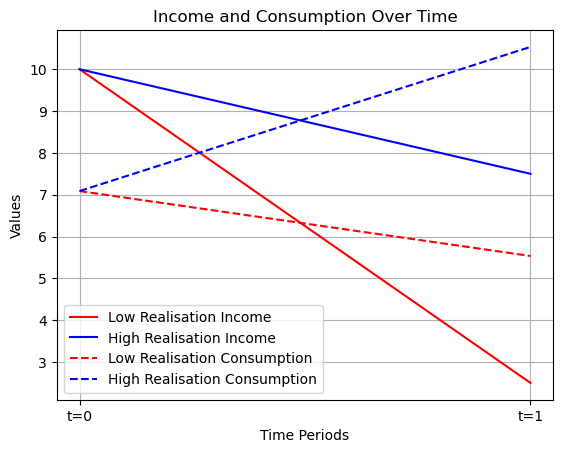

In [18]:
# Plot for question d
periods = [f"t={period}" for period in range(len(y_low))]

plt.plot(periods, y_low, label='Low Realisation Income', color='red')
plt.plot(periods, y_high, label='High Realisation Income', color='blue')
plt.plot(periods, low_outcome_consumption, label='Low Realisation Consumption', linestyle='--', color='red')
plt.plot(periods, high_outcome_consumption, label='High Realisation Consumption', linestyle='--', color='blue')

plt.xlabel('Time Periods')
plt.ylabel('Values')
plt.title('Income and Consumption Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Part e
print(f"The savings rate in a world with certainty is {np.round(savings_rate_certainty, 3)}, while the savings rate with a low \
income realisation is {np.round(low_outcome_savings, 3)} and the savings rate with a high income realisation is \
{np.round(high_outcome_savings, 3)}. We can see that the savings rate is similar for when there is uncertainty and it is greater \
than when there is no uncertainty. \
When there is income risk, individuals tend to adopt precautionary saving behavior to mitigate the potential negative \
consequences of uncertain future income. The uncertainty in income creates a need for a financial buffer to smooth \
consumption over time, especially during periods of low or unpredictable income. Consequently, individuals save more during \
times of income uncertainty to safeguard against potential income shocks or unexpected expenses. This precautionary saving \
motive leads to a higher savings rate compared to situations with more predictable income streams. From a real-life perspective, \
consider a scenario where an individual's income is tied to a volatile industry or job market. In such cases, the individual may \
save more during periods of economic stability to prepare for potential layoffs or downturns in the industry. This increased \
savings rate serves as a form of insurance against income fluctuations, providing a sense of financial security and stability \
in the face of uncertain future income.")

The savings rate in a world with certainty is [2.446], while the savings rate with a low income realisation is [2.914] and the savings rate with a high income realisation is [2.912]. We can see that the savings rate is similar for when there is uncertainty and it is greater than when there is no uncertainty. When there is income risk, individuals tend to adopt precautionary saving behavior to mitigate the potential negative consequences of uncertain future income. The uncertainty in income creates a need for a financial buffer to smooth consumption over time, especially during periods of low or unpredictable income. Consequently, individuals save more during times of income uncertainty to safeguard against potential income shocks or unexpected expenses. This precautionary saving motive leads to a higher savings rate compared to situations with more predictable income streams. From a real-life perspective, consider a scenario where an individual's income is tied to a volatile industry o